In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [20]:
def display_img(img):
    fig=plt.figure(figsize=(12,10))
    ax=plt.subplot(111)
    ax.imshow(img,cmap='gray')

In [21]:
reeses=cv2.imread("../DATA/reeses_puffs.png",0)
cereals=cv2.imread("../DATA/many_cereals.jpg",0)

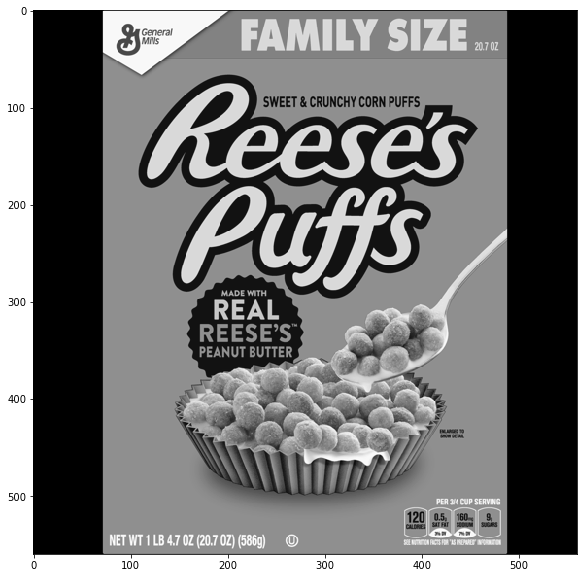

In [22]:
display_img(reeses)

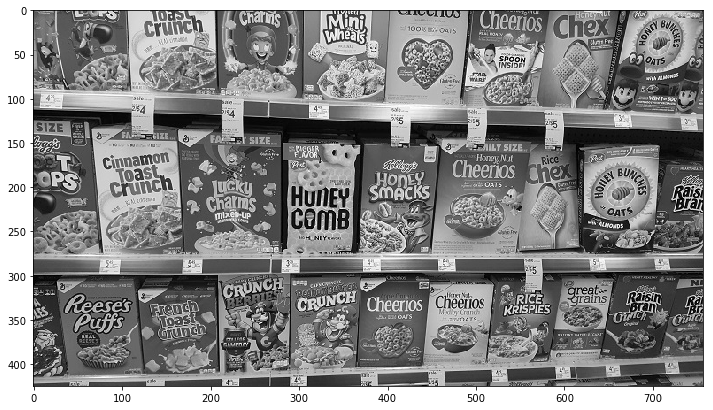

In [23]:
display_img(cereals)

In [24]:
sift=cv2.xfeatures2d.SIFT_create()

In [25]:
sift

<xfeatures2d_SIFT 000001CBA9110A90>

In [27]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

In [56]:
#FLANN
FLANN_INDEX_KDTREE=0
index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params=dict(checks=50)

In [57]:
#FLANN IS A MATCHER

In [58]:
flann=cv2.FlannBasedMatcher(index_params,search_params)

In [59]:
flann

<FlannBasedMatcher 000001CBA82A2F90>

In [60]:
matches=flann.knnMatch(des1,des2,k=2)

In [61]:
#RATIO TEST

In [62]:
good=[]

for match1,match2 in matches:
    if match1.distance < 0.75* match2.distance:
        good.append([match1])

In [63]:
#drawing

In [64]:
result=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

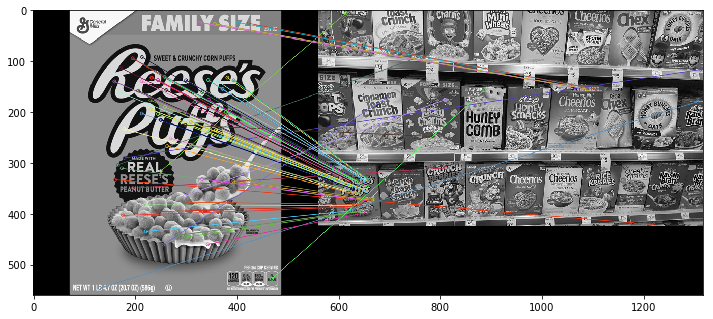

In [65]:
display_img(result)

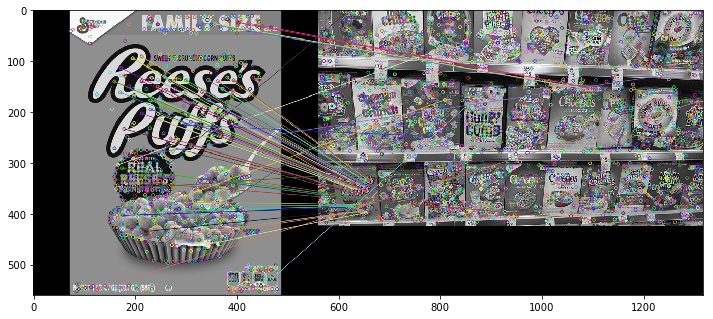

In [68]:
result=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)
display_img(result)

In [40]:
####

In [41]:
####

In [45]:
####FLANN based matcher is faster than brute force but changing matcher parameters too much may slow it down

In [43]:
####

In [44]:
####

In [66]:
# Coloring all lines in one color and all dots in another

In [69]:
sift=cv2.xfeatures2d.SIFT_create()

In [70]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

In [71]:
#FLANN PARAMETERS FOR SIFT TRACKER

In [72]:
FLANN_INDEX_KDTREE=0
index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params=dict(checks=50)

In [73]:
flann=cv2.FlannBasedMatcher(index_params,search_params)

In [74]:
matches=flann.knnMatch(des1,des2,k=2)

In [86]:
#MAKING A MATCHESMASK
matchesMask=[[0,0] for i in range(len(matches))]

In [87]:
matchesMask[0:3]

[[0, 0], [0, 0], [0, 0]]

In [88]:
#RATIO TEST
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.75* match2.distance:
        matchesMask[i]=[1,0]  # marking close values instead of storing them in different list

In [89]:
draw_params=dict(matchColor=(0,255,0),
                 singlePointColor=(255,0,0),
                 matchesMask=matchesMask,
                 flags=0)   
                

In [90]:
#we'll pass all matches here and use matchesMask as a mark to know which are the best values
result=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

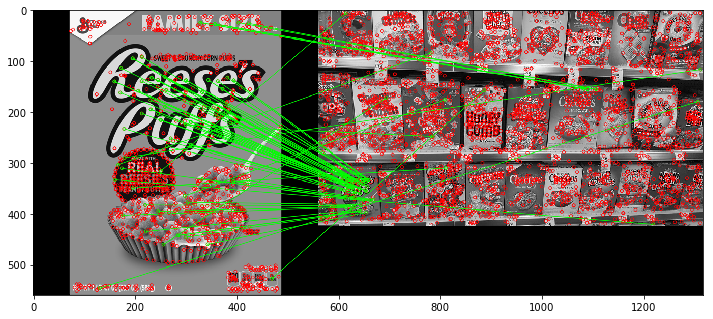

In [91]:
display_img(result)